# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

# Import Statements

In [71]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

sns.set(style='whitegrid')
pd.options.display.max_columns = 50

# define data dir relative to this notebook
DATA_DIR = os.path.join(os.getcwd(), 'data')
print('DATA_DIR =', DATA_DIR)


DATA_DIR = c:\Users\angel\Documents\git_projects\100-days-of-code-python\day_74_merge_data_with_pandas\data


# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [72]:
# Colors exploration (optional - file may not exist)
try:
    colors = pd.read_csv(os.path.join(DATA_DIR,'colors.csv'))
    print('colors shape:', colors.shape)
    print('unique colors:', colors['name'].nunique())
except FileNotFoundError:
    print('colors.csv not found in', DATA_DIR)

colors shape: (135, 4)
unique colors: 135


In [73]:
try:
    print('Transparency counts (value_counts):')
    print(colors['is_trans'].value_counts())
except NameError:
    print('colors DataFrame not loaded; run the colors cell first')

Transparency counts (value_counts):
is_trans
f    107
t     28
Name: count, dtype: int64


In [74]:
try:
    print('Transparency counts (groupby):')
    print(colors.groupby('is_trans').size())
except NameError:
    print('colors DataFrame not loaded; run the colors cell first')

Transparency counts (groupby):
is_trans
f    107
t     28
dtype: int64


**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [75]:
# Method 1: value_counts to compare transparent vs opaque (if colors loaded)
try:
    print(colors['is_trans'].value_counts())
except NameError:
    print('colors DataFrame not loaded; run the colors cell first')

is_trans
f    107
t     28
Name: count, dtype: int64


In [76]:
# Method 2: groupby + size to show the same breakdown
try:
    print(colors.groupby('is_trans').size())
except NameError:
    print('colors DataFrame not loaded; run the colors cell first')

is_trans
f    107
t     28
dtype: int64


**Challenge**: Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image https://i.imgur.com/whB1olq.png 

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [77]:
# Read datasets
sets = pd.read_csv(os.path.join(DATA_DIR, 'sets.csv'))
themes = pd.read_csv(os.path.join(DATA_DIR, 'themes.csv'))

# quick look
print('sets:', sets.shape)
print(sets.head().to_string(index=False))
print('\n---\n')
print('themes:', themes.shape)
print(themes.head().to_string(index=False))

sets: (15710, 5)
set_num                       name  year  theme_id  num_parts
  001-1                      Gears  1965         1         43
 0011-2          Town Mini-Figures  1978        84         12
 0011-3 Castle 2 for 1 Bonus Offer  1987       199          0
 0012-1         Space Mini-Figures  1979       143         12
 0013-1         Space Mini-Figures  1979       143         12

---

themes: (596, 3)
 id           name  parent_id
  1        Technic        NaN
  2 Arctic Technic        1.0
  3    Competition        1.0
  4 Expert Builder        1.0
  5          Model        1.0


In [78]:
# show first and last couple of rows of sets
display(sets.head())
display(sets.tail())

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


In [79]:
# show concise info about sets dataframe
print(sets.info())
print('print(sets.isnull().sum())Missing values by column:')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15710 entries, 0 to 15709
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    15710 non-null  object
 1   name       15710 non-null  object
 2   year       15710 non-null  int64 
 3   theme_id   15710 non-null  int64 
 4   num_parts  15710 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 613.8+ KB
None
print(sets.isnull().sum())Missing values by column:


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [80]:
# What was the first year that LEGO sets were released?
sets_years = sets.dropna(subset=['year'])
first_year = int(sets_years['year'].min())
first_year, 'sets_in_first_year' , sets_years[sets_years['year']==first_year].shape[0]

# show the sets in that first year
sets_first_year = sets_years[sets_years['year']==first_year] 
sets_first_year[['set_num','name','year']].sort_values('set_num').head(20)


,set_num,name,year
9521,700.1-1,Extra-Large Gift Set (ABB),1949
9534,700.2-1,Large Gift Set (ABB),1949
9539,700.3-1,Medium Gift Set (ABB),1949
9544,700.A-1,Small Brick Set (ABB),1949
9545,700.B-1,Small Doors and Windows Set (ABB),1949


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [81]:
# How many different sets did LEGO sell in their first year and how many themes?
num_sets_first_year = sets_first_year.shape[0]
num_themes_first_year = sets_first_year['theme_id'].nunique()
print('first_year =', first_year)
print('number of sets in first year =', num_sets_first_year)
print('number of unique theme_ids in first year =', num_themes_first_year)
sets_first_year[['set_num','name','theme_id']].sort_values('set_num')

first_year = 1949
number of sets in first year = 5
number of unique theme_ids in first year = 2


,set_num,name,theme_id
9521,700.1-1,Extra-Large Gift Set (ABB),365
9534,700.2-1,Large Gift Set (ABB),365
9539,700.3-1,Medium Gift Set (ABB),365
9544,700.A-1,Small Brick Set (ABB),371
9545,700.B-1,Small Doors and Windows Set (ABB),371


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [82]:
# Top 5 sets by number of parts
sets_with_parts = sets.dropna(subset=['num_parts']).copy()
sets_with_parts['num_parts'] = sets_with_parts['num_parts'].astype(int)
top5 = sets_with_parts.sort_values('num_parts', ascending=False).head(10)
top5[['set_num','name','year','num_parts']]


,set_num,name,year,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,9987
11183,75192-1,UCS Millennium Falcon,2017,7541
10551,71043-1,Hogwarts Castle,2018,6020
295,10256-1,Taj Mahal,2017,5923
221,10189-1,Taj Mahal,2008,5922
11471,75978-1,Diagon Alley,2020,5547
15612,SWMP-1,Star Wars / M&M Mosaic - Promo Set,2005,5462
1689,2000409-1,Window Exploration Bag,2010,5200
212,10179-1,Millennium Falcon - UCS,2007,5195
9805,70620-1,NINJAGO City,2017,4873


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [83]:
# Number of sets released each year
sets_per_year = sets.groupby('year').count()['set_num'].rename('sets')
sets_per_year = sets_per_year[sets_per_year.index.notna()]
sets_per_year.index = sets_per_year.index.astype(int)
sets_per_year = sets_per_year.sort_index()
sets_per_year.tail()


year
2017    786
2018    816
2019    840
2020    674
2021      3
Name: sets, dtype: int64

In [84]:
# quick tail of sets to inspect recent entries
sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

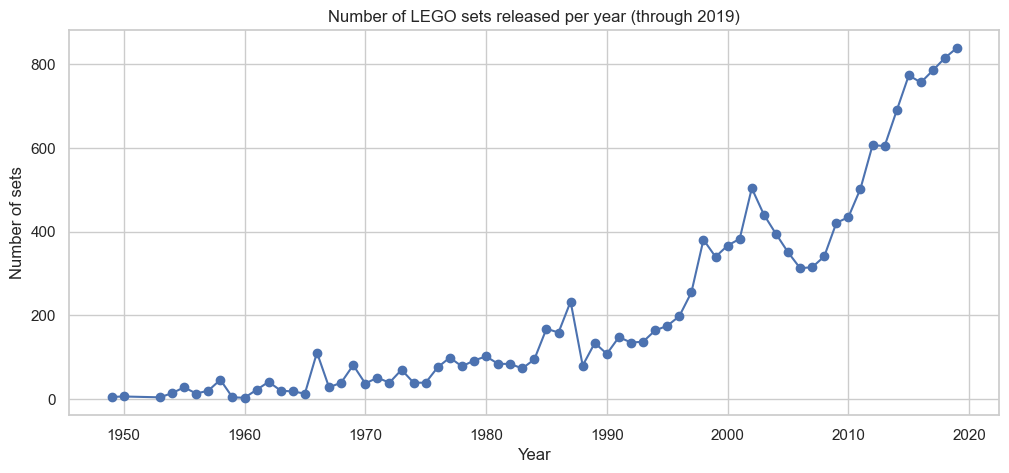

In [85]:
# Plot sets per year (exclude partial years 2020 and 2021 if present)
plot_years = sets_per_year.loc[sets_per_year.index <= 2019] if 2019 in sets_per_year.index else sets_per_year
plt.figure(figsize=(12,5))
plt.plot(plot_years.index, plot_years.values, marker='o')
plt.title('Number of LEGO sets released per year (through 2019)')
plt.xlabel('Year')
plt.ylabel('Number of sets')
plt.show()


In [86]:
# display combined head and tail for convenience
pd.concat([sets.head(), sets.tail()])

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [87]:
# Number of unique themes per year (count unique theme_id)
themes_per_year = sets.dropna(subset=['year']).groupby('year').agg({'theme_id': pd.Series.nunique})
themes_per_year = themes_per_year.rename(columns={'theme_id':'num_themes'})
themes_per_year.index = themes_per_year.index.astype(int)
themes_per_year = themes_per_year.sort_index()
themes_per_year.tail()


,num_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


In [88]:
# preview themes_per_year
themes_per_year.head()

,num_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

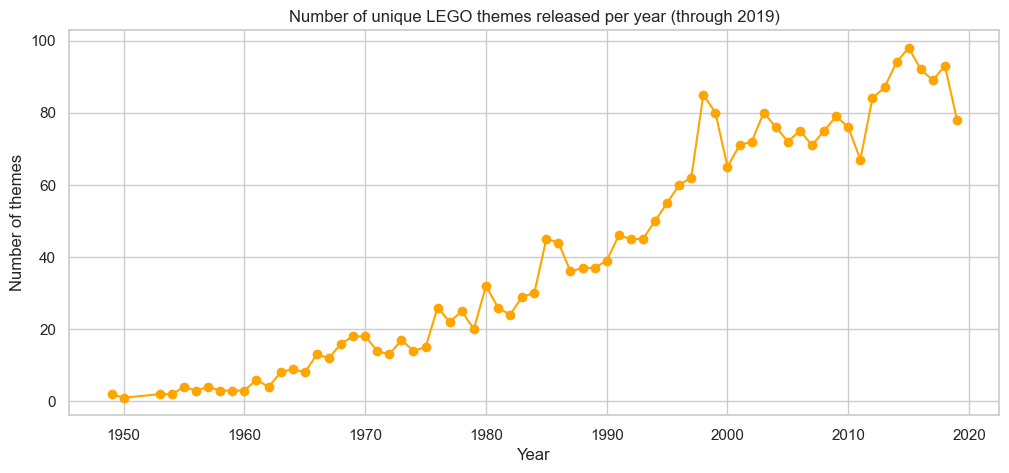

In [89]:
# Plot number of themes per year (exclude partial years)
plot_themes = themes_per_year.loc[themes_per_year.index <= 2019] if 2019 in themes_per_year.index else themes_per_year
plt.figure(figsize=(12,5))
plt.plot(plot_themes.index, plot_themes['num_themes'], marker='o', color='orange')
plt.title('Number of unique LEGO themes released per year (through 2019)')
plt.xlabel('Year')
plt.ylabel('Number of themes')
plt.show()


### Line Charts with Two Seperate Axes

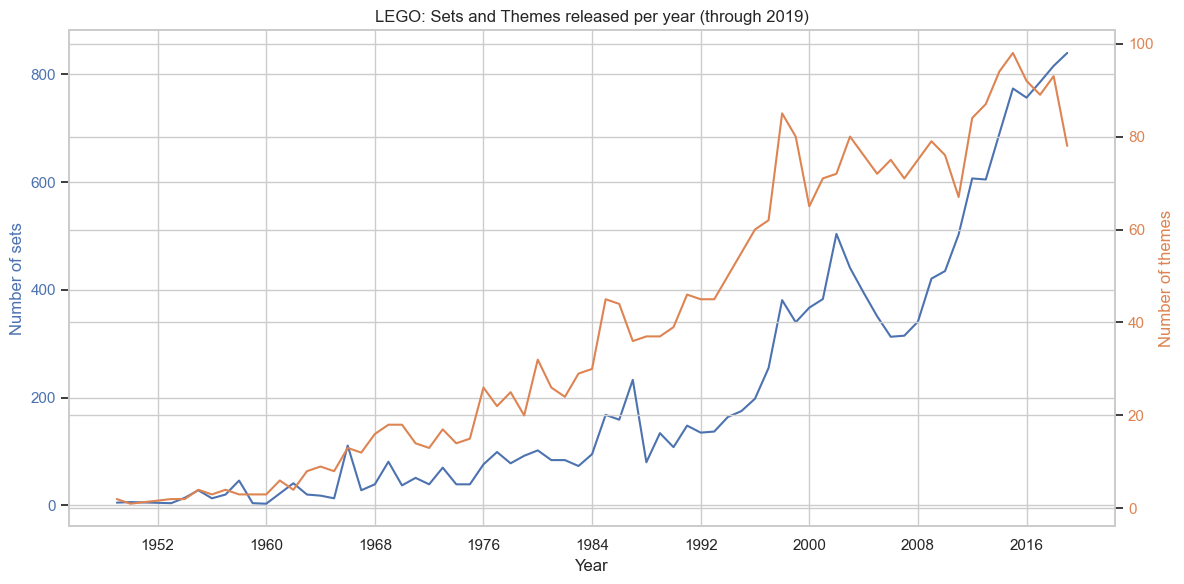

In [90]:
# Dual axis: number of sets and number of themes per year (through 2019)
years = sorted(list(set(sets_per_year.index) & set(themes_per_year.index)))
years = [y for y in years if y<=2019]
fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()
ax1.plot(years, [sets_per_year.loc[y] for y in years], color='C0', label='sets')
ax2.plot(years, [themes_per_year.loc[y,'num_themes'] for y in years], color='C1', label='themes')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of sets', color='C0')
ax2.set_ylabel('Number of themes', color='C1')
ax1.set_title('LEGO: Sets and Themes released per year (through 2019)')
ax1.tick_params(axis='y', labelcolor='C0')
ax2.tick_params(axis='y', labelcolor='C1')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
plt.show()

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [91]:
# Average and median number of parts per year
parts_by_year = sets.dropna(subset=['year','num_parts']).copy()
parts_by_year['num_parts'] = parts_by_year['num_parts'].astype(int)
parts_agg = parts_by_year.groupby('year').agg({'num_parts':['mean','median']})
parts_agg.columns = ['mean_parts','median_parts']
parts_agg.index = parts_agg.index.astype(int)
parts_agg = parts_agg.sort_index()
parts_agg.loc[[1954,2017]] if 1954 in parts_agg.index and 2017 in parts_agg.index else parts_agg.head()


,mean_parts,median_parts
year,,
1954,12.357143,5.0
2017,221.840967,55.5


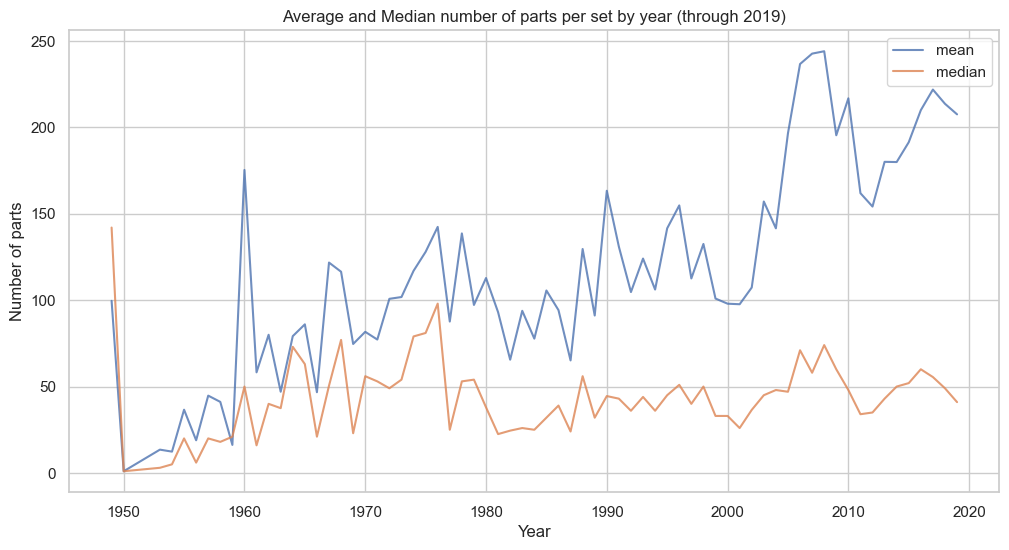

In [92]:
# Plot mean and median parts per year (through 2019)
plot_p = parts_agg.loc[parts_agg.index<=2019] if 2019 in parts_agg.index else parts_agg
plt.figure(figsize=(12,6))
plt.plot(plot_p.index, plot_p['mean_parts'], label='mean', alpha=0.8)
plt.plot(plot_p.index, plot_p['median_parts'], label='median', alpha=0.8)
plt.title('Average and Median number of parts per set by year (through 2019)')
plt.xlabel('Year')
plt.ylabel('Number of parts')
plt.legend()
plt.show()

### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

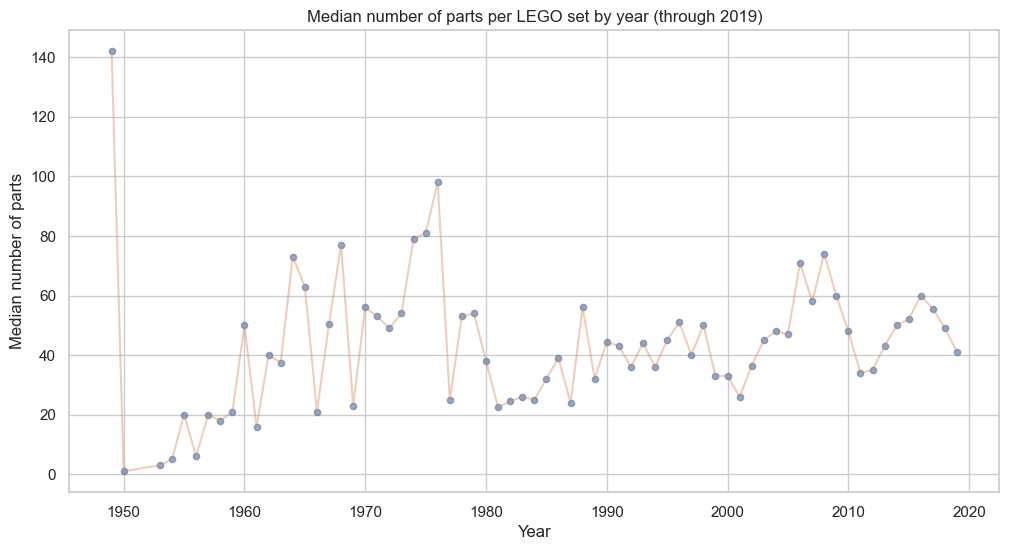

In [93]:
# Scatter plot of median parts over time to see trend
plot_parts = parts_agg.loc[parts_agg.index <= 2019] if 2019 in parts_agg.index else parts_agg
plt.figure(figsize=(12,6))
plt.scatter(plot_parts.index, plot_parts['median_parts'], alpha=0.6, s=20)
plt.plot(plot_parts.index, plot_parts['median_parts'], alpha=0.4, color='C1')
plt.title('Median number of parts per LEGO set by year (through 2019)')
plt.xlabel('Year')
plt.ylabel('Median number of parts')
plt.yscale('linear')
plt.show()


### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [94]:
# Which theme has the most sets? Merge themes and sets and count set occurrences per theme name
merged = sets.merge(themes, left_on='theme_id', right_on='id', how='left', suffixes=('','_theme'))
theme_counts = merged.groupby('name_theme').agg({'set_num':'count'}).rename(columns={'set_num':'num_sets'})
theme_counts = theme_counts.sort_values('num_sets', ascending=False)
theme_counts.head(20)


,num_sets
name_theme,
Star Wars,776
Gear,656
Basic Set,558
Supplemental,535
Technic,453
Friends,415
Ninjago,360
Town,360
Key Chain,329


**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [95]:
# Explore themes.csv for 'Star Wars' entries
star_wars = themes[themes['name'].str.contains('Star Wars', na=False, case=False)]
star_wars[['id','name','parent_id']].head(20)

# Find sets that belong to any of these Star Wars theme ids
sw_ids = star_wars['id'].astype(int).tolist() if not star_wars.empty else []
sets_sw = sets[sets['theme_id'].isin(sw_ids)] if sw_ids else pd.DataFrame()
sets_sw[['set_num','name','year','num_parts']].head(20)


,set_num,name,year,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,70
1717,20006-1,Clone Turbo Tank - Mini,2008,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,84
1738,20009-1,AT-TE Walker - Mini,2009,94
1740,20010-1,Republic Gunship - Mini,2009,94
1746,20016-1,Imperial Shuttle - Mini,2010,70
1748,20018-1,AT-AT Walker - Mini,2010,83
1749,20019-1,Slave I,2011,76
1752,20021-1,Bounty Hunter Gunship - Mini,2011,81


In [96]:
print('Star Wars theme ids found:', sw_ids)
print('Number of Star Wars sets found in sets.csv:', sets_sw.shape[0] if not sets_sw.empty else 0)
sets_sw.head()

Star Wars theme ids found: [18, 158, 209, 261]
Number of Star Wars sets found in sets.csv: 776


,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94


In [97]:
# show top 10 themes by number of sets
theme_counts.head(10)

,num_sets
name_theme,
Star Wars,776
Gear,656
Basic Set,558
Supplemental,535
Technic,453
Friends,415
Ninjago,360
Town,360
Key Chain,329


In [98]:
# how many sets are missing a theme name after merge?
print('missing theme names after merge:', merged['name_theme'].isna().sum())
merged[merged['name_theme'].isna()].head()

missing theme names after merge: 0


,set_num,name,year,theme_id,num_parts,id,name_theme,parent_id


In [99]:
# display some themes for inspection
themes.head(20)

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
5,6,Airport,5.0
6,7,Construction,5.0
7,8,Farm,5.0
8,9,Fire,5.0
9,10,Harbor,5.0


### Merging (i.e., Combining) DataFrames based on a Key


In [100]:
# Demonstrate merge and show a few merged rows
merged_sample = merged[['set_num','name','year','num_parts','name_theme']].drop_duplicates().head(20)
merged_sample


,set_num,name,year,num_parts,name_theme
0,001-1,Gears,1965,43,Technic
1,0011-2,Town Mini-Figures,1978,12,Supplemental
2,0011-3,Castle 2 for 1 Bonus Offer,1987,0,Lion Knights
3,0012-1,Space Mini-Figures,1979,12,Supplemental
4,0013-1,Space Mini-Figures,1979,12,Supplemental
5,0014-1,Space Mini-Figures,1979,12,Supplemental
6,0015-1,Space Mini-Figures,1979,18,Supplemental
7,0016-1,Castle Mini Figures,1978,15,Castle
8,002-1,4.5V Samsonite Gears Motor Set,1965,3,Technic
9,003-1,Master Mechanic Set,1966,403,Basic Set


In [101]:
# summary outputs: largest set and theme with most sets
largest_set = top5.iloc[0] if not top5.empty else None
most_popular_theme = theme_counts.head(1)
print('Largest set:')
if largest_set is not None:
    print(largest_set[['set_num','name','year','num_parts']])
else:
    print('No largest set found')
print('\nTheme with most sets:')
print(most_popular_theme)

Largest set:
set_num                           BIGBOX-1
name         The Ultimate Battle for Chima
year                                  2015
num_parts                             9987
Name: 15004, dtype: object

Theme with most sets:
            num_sets
name_theme          
Star Wars        776


In [102]:
# End of notebook - you can re-run cells to refresh figures and tables.
print('Notebook completed: run cells from top to bottom to reproduce analysis')

Notebook completed: run cells from top to bottom to reproduce analysis
